# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-6.1.-Implementing-sigmoidal-Least-Squares-cost" data-toc-modified-id="Exercise-6.1.-Implementing-sigmoidal-Least-Squares-cost-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 6.1. Implementing sigmoidal Least Squares cost</a></div><div class="lev1 toc-item"><a href="#Exercise-6.3.-Implementing-the-Cross-Entropy-cost" data-toc-modified-id="Exercise-6.3.-Implementing-the-Cross-Entropy-cost-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 6.3. Implementing the Cross Entropy cost</a></div><div class="lev1 toc-item"><a href="#Exercise-6.7.-Implementing-the-Softmax-cost" data-toc-modified-id="Exercise-6.7.-Implementing-the-Softmax-cost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 6.7. Implementing the Softmax cost</a></div><div class="lev1 toc-item"><a href="#Exercise-6.8.-Implementing-the-Log-Error-version-of-Softmax" data-toc-modified-id="Exercise-6.8.-Implementing-the-Log-Error-version-of-Softmax-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 6.8. Implementing the Log Error version of Softmax</a></div><div class="lev1 toc-item"><a href="#Exercise-6.9.-Using-gradient-descent-to-minimize-the-Perceptron-cost" data-toc-modified-id="Exercise-6.9.-Using-gradient-descent-to-minimize-the-Perceptron-cost-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 6.9. Using gradient descent to minimize the Perceptron cost</a></div><div class="lev1 toc-item"><a href="#Exercise-6.13.-Compare-the-efficacy-of-two-class-cost-functions-I" data-toc-modified-id="Exercise-6.13.-Compare-the-efficacy-of-two-class-cost-functions-I-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 6.13. Compare the efficacy of two-class cost functions I</a></div><div class="lev1 toc-item"><a href="#Exercise-6.14.-Compare-the-efficacy-of-two-class-cost-functions-II" data-toc-modified-id="Exercise-6.14.-Compare-the-efficacy-of-two-class-cost-functions-II-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 6.14. Compare the efficacy of two-class cost functions II</a></div><div class="lev1 toc-item"><a href="#Exercise-6.15.-Credit-check" data-toc-modified-id="Exercise-6.15.-Credit-check-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 6.15. Credit check</a></div><div class="lev1 toc-item"><a href="#Exercise-6.16.-Weighted-classification-and-balanced-accuracy" data-toc-modified-id="Exercise-6.16.-Weighted-classification-and-balanced-accuracy-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 6.16. Weighted classification and balanced accuracy</a></div>

In [1]:
# import autograd-wrapped numpy
import autograd.numpy as np

# datapath to data
datapath = '/Users/sherryan/Downloads/'

# Exercise 6.12. The regularized Softmax

In [64]:
# load in data
csvname = datapath + '2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')

# take input/output pairs from data
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(1, 11)
(1, 11)


In [65]:
from autograd import grad 
from autograd import hessian
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-10)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))

        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [66]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def softmax(w):
    lam = 10**(-3)
    cost = np.sum(np.log(1+np.exp(-y*model(x,w)))) + lam * np.sum((w[1:]**2))
    return cost/float(np.size(y))


In [67]:
weight_history, cost_history = newtons_method(softmax,5,np.ones((2,1)))

In [68]:
true_labels = y
pred_labels = np.sign(model(x,weight_history[-1]))
misclass_count = np.size(np.argwhere(true_labels != pred_labels))
print(misclass_count,'misclassifications')

0 misclassifications


# Exercise 6.13. Compare the efficacy of two-class cost functions I

Below we load in the breast cancer dataset -  [a description of which you can find here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)).  The input datapoints are stacked *column-wise* in this dataset, with the final row being the label of each point.

In [69]:
# data input
csvname = datapath + 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(8, 699)
(1, 699)


In [70]:
def gradient_descent(g, alpha, max_its, w):
    gradient = grad(g)
    
    weight_history = [w]
    cost_history = [g(w)]
    for k in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

In [71]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def softmax(w):
    cost = np.sum(np.log(1+np.exp(-y*model(x,w))))
    return cost/float(np.size(y))
def perceptron(w):
    cost = np.sum(np.maximum(0,-y * model(x,w)))
    return cost/float(np.size(y))

In [104]:
w = 0.01*np.random.rand(9,1)
alpha = 1
max_its = 1000
weight_history_1,cost_history_1 = gradient_descent(softmax,alpha,max_its,w)
weight_history_2,cost_history_2 = gradient_descent(perceptron,alpha,max_its,w)

In [105]:
true_labels = y.flatten()

sm_pred_labels = [np.sign(model(x,wh)) for wh in weight_history_1]
pt_pred_labels = [np.sign(model(x,wh)) for wh in weight_history_2]

sm_misclass = [np.size(np.argwhere(true_labels != pl.flatten())) for pl in sm_pred_labels]
pt_misclass = [np.size(np.argwhere(true_labels != pl.flatten())) for pl in pt_pred_labels]

last step of softmax has 21 misclassification
last step of perceptron has 21 misclassification


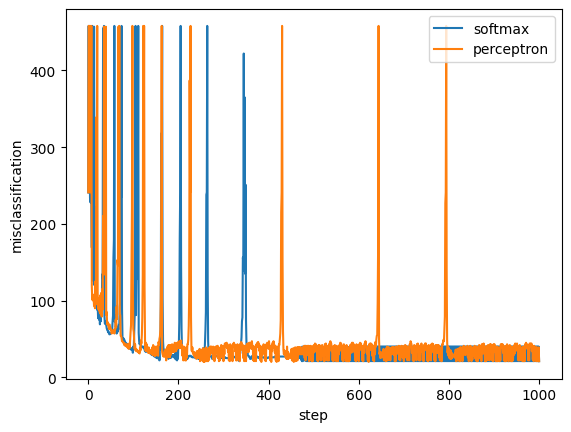

In [106]:
import matplotlib.pyplot as plt
plt.plot(sm_misclass, label = 'softmax')
plt.plot(pt_misclass, label = 'perceptron')
plt.legend()
plt.xlabel('step')
plt.ylabel('misclassification')
print('last step of softmax has',sm_misclass[-1],'misclassification')
print('last step of perceptron has',pt_misclass[-1],'misclassification')



# Exercise 6.15. Credit check

In [123]:
# load in dataset
csvname = datapath + 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(20, 1000)
(1, 1000)


In [124]:
import scipy.stats as stats
x = stats.zscore(x,axis = 1)

In [165]:
alpha = 1
max_its = 1000
w = 1*np.random.rand(x.shape[0]+1,1)
weight_history,cost_history = gradient_descent(perceptron, alpha, max_its,w)

Text(0, 0.5, 'classification accuracy')

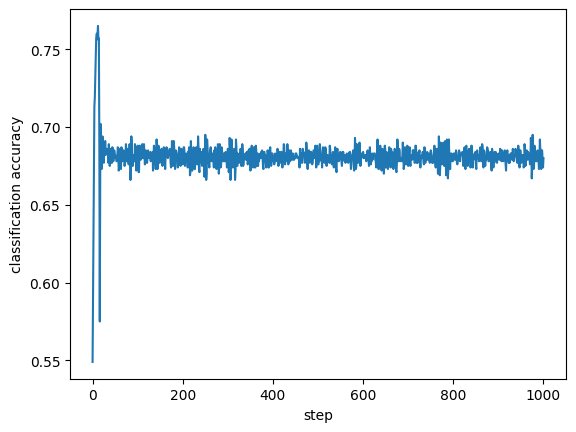

In [166]:
true_labels = y.flatten()

pred_labels = [np.sign(model(x,wh)) for wh in weight_history]
acc_rate = [np.size(np.argwhere(true_labels == pl.flatten()))/y.shape[1] for pl in pred_labels]

plt.plot(acc_rate)
plt.xlabel('step')
plt.ylabel('classification accuracy')

In [172]:
print('best classification accuracy achieved is',np.max(acc_rate)*100,'% at step',np.argmax(acc_rate))

best classification accuracy achieved is 76.5 % at step 12


# Exercise 6.16. Weighted classification and balanced accuracy

In [213]:
# data input
csvname = datapath + '3d_classification_data_v2_mbalanced.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(2, 55)
(1, 55)


In [214]:
class1_idx = np.argwhere(y.flatten()==-1).flatten()
class2_idx = np.argwhere(y.flatten()==1).flatten()


In [226]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def weighted_softmax(w):
    cost = 0
    beta = [1,1]
    sigmoid = 1/(1+np.exp(-(model(x,w))))
    cost -= beta[0]*np.sum(np.log(1-sigmoid[:,class1_idx]))
    cost -= beta[1]*np.sum(np.log(sigmoid[:,class2_idx]))
    return cost/float(y.size)
w = np.random.rand(x.shape[0]+1, 1)
weight_history, cost_history = newtons_method(weighted_softmax, 5,w)

true_labels = y.flatten()
pred_labels = np.sign(model(x,weight_history[-1])).flatten()                  
class1_acc = np.size(np.argwhere(true_labels[class1_idx] == pred_labels[class1_idx].flatten()))/len(class1_idx)
class2_acc = np.size(np.argwhere(true_labels[class2_idx] == pred_labels[class2_idx].flatten()))/len(class2_idx)

balanced_acc = (class1_acc + class2_acc)/2
print('beta=1, balanced_accuracy is',balanced_acc*100,'%')
acc_rate = np.size(np.argwhere(true_labels == pred_labels))/y.shape[1]
print('accuracy is',acc_rate*100,'%')

beta=1, balanced_accuracy is 79.0 %
accuracy is 94.54545454545455 %


In [227]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def weighted_softmax(w):
    cost = 0
    beta = [1,5]
    sigmoid = 1/(1+np.exp(-(model(x,w))))
    cost -= beta[0]*np.sum(np.log(1-sigmoid[:,class1_idx]))
    cost -= beta[1]*np.sum(np.log(sigmoid[:,class2_idx]))
    return cost/float(y.size)

w = np.random.rand(x.shape[0]+1, 1)
weight_history, cost_history = newtons_method(weighted_softmax, 5,w)

true_labels = y.flatten()
pred_labels = np.sign(model(x,weight_history[-1])).flatten()                  
class1_acc = np.size(np.argwhere(true_labels[class1_idx] == pred_labels[class1_idx].flatten()))/len(class1_idx)
class2_acc = np.size(np.argwhere(true_labels[class2_idx] == pred_labels[class2_idx].flatten()))/len(class2_idx)

balanced_acc = (class1_acc + class2_acc)/2

print('beta=5, balanced_accuracy is',balanced_acc*100,'%')
acc_rate = np.size(np.argwhere(true_labels == pred_labels))/y.shape[1]
print('accuracy is',acc_rate*100,'%')



beta=5, balanced_accuracy is 87.0 %
accuracy is 92.72727272727272 %


In [228]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def weighted_softmax(w):
    cost = 0
    beta = [1,10]
    sigmoid = 1/(1+np.exp(-(model(x,w))))
    cost -= beta[0]*np.sum(np.log(1-sigmoid[:,class1_idx]))
    cost -= beta[1]*np.sum(np.log(sigmoid[:,class2_idx]))
    return cost/float(y.size)

w = np.random.rand(x.shape[0]+1, 1)
weight_history, cost_history = newtons_method(weighted_softmax, 5,w)

true_labels = y.flatten()
pred_labels = np.sign(model(x,weight_history[-1])).flatten()                  
class1_acc = np.size(np.argwhere(true_labels[class1_idx] == pred_labels[class1_idx].flatten()))/len(class1_idx)
class2_acc = np.size(np.argwhere(true_labels[class2_idx] == pred_labels[class2_idx].flatten()))/len(class2_idx)

balanced_acc = (class1_acc + class2_acc)/2
print('beta=10, balanced_accuracy is',balanced_acc*100,'%')
acc_rate = np.size(np.argwhere(true_labels == pred_labels))/y.shape[1]
print('accuracy is',acc_rate*100,'%')


beta=10, balanced_accuracy is 96.0 %
accuracy is 92.72727272727272 %
